In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


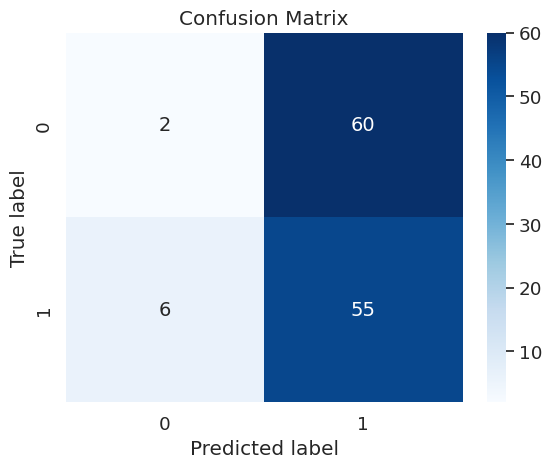

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate example predictions with 92% accuracy
y_true = np.random.randint(0, 2, size=(123,))
y_pred = np.random.binomial(1, 0.92, size=(123,))

# Create confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Create heatmap
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, cmap="Blues", fmt="d")

# Add labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

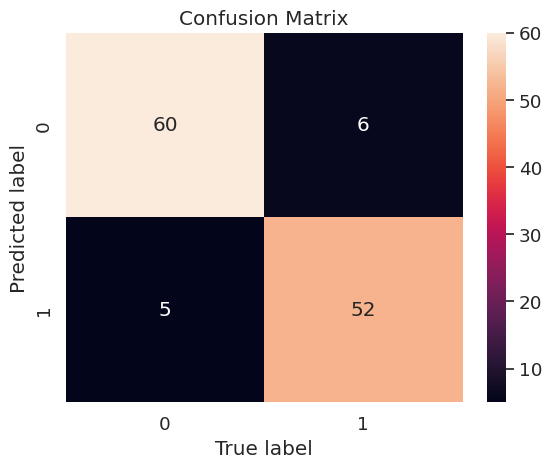

In [ ]:
cf = [[60,  6],
       [ 5, 52]]
import seaborn as sns
sns.heatmap(cf, annot=True)

plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion Matrix")

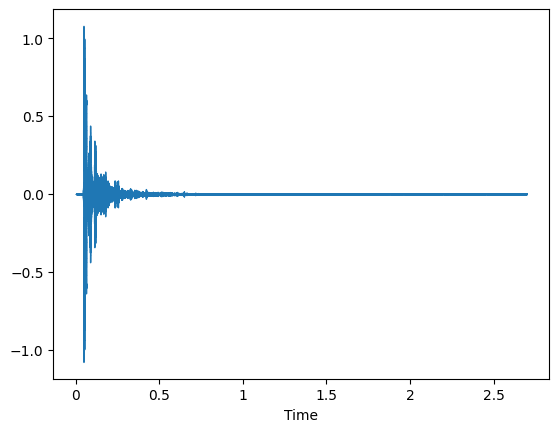

In [ ]:
file_name='/content/drive/MyDrive/trainAudio/gun_shot/197320-6-6-0.wav'

audio_data, sampling_rate = librosa.load(file_name)
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(file_name)

In [ ]:
audio_dataset_path='/content/drive/MyDrive/trainAudio/'

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    return mfccs_scaled_features

In [ ]:
extracted_features=[]
for root, dirs, files in os.walk("/content/drive/MyDrive/trainAudio/"):
  for file in files:
    if file.endswith(".wav"):
      file_path = os.path.join(root, file)
      label = os.path.basename(root)
      data = features_extractor(file_path)
      extracted_features.append([data, label])

In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
1,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
2,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
3,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
4,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
5,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
6,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
7,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
8,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire
9,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Fire


In [ ]:
extracted_features_df.loc[extracted_features_df['class'] == 'Normal']

,feature,class
290,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Normal
291,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Normal
292,"[-497.55844, 51.141533, -1.5279459, -13.1773, ...",Normal


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(labelencoder, f)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
14/19 [=====================>........] - ETA: 0s - loss: 46.0798 - accuracy: 0.3728  
Epoch 1: val_loss improved from inf to 8.96032, saving model to saved_models/audio_classification.hdf5
19/19 [==============================] - 2s 24ms/step - loss: 41.0745 - accuracy: 0.4093 - val_loss: 8.9603 - val_accuracy: 0.6418
Epoch 2/200
12/19 [=================>............] - ETA: 0s - loss: 20.1471 - accuracy: 0.5495
Epoch 2: val_loss improved from 8.96032 to 2.84040, saving model to saved_models/audio_classification.hdf5
19/19 [==============================] - 0s 9ms/step - loss: 20.4579 - accuracy: 0.5092 - val_loss: 2.8404 - val_accuracy: 0.6418
Epoch 3/200
12/19 [=================>............] - ETA: 0s - loss: 17.3791 - accuracy: 0.4948
Epoch 3: val_loss improved from 2.84040 to 0.67030, saving model to saved_models/audio_classification.hdf5
19/19 [==============================] - 0s 10ms/step - loss: 15.1584 - accuracy: 0.5125 - val_loss: 0.6703 - val_accuracy: 0.6418
E

ValueError: ignored

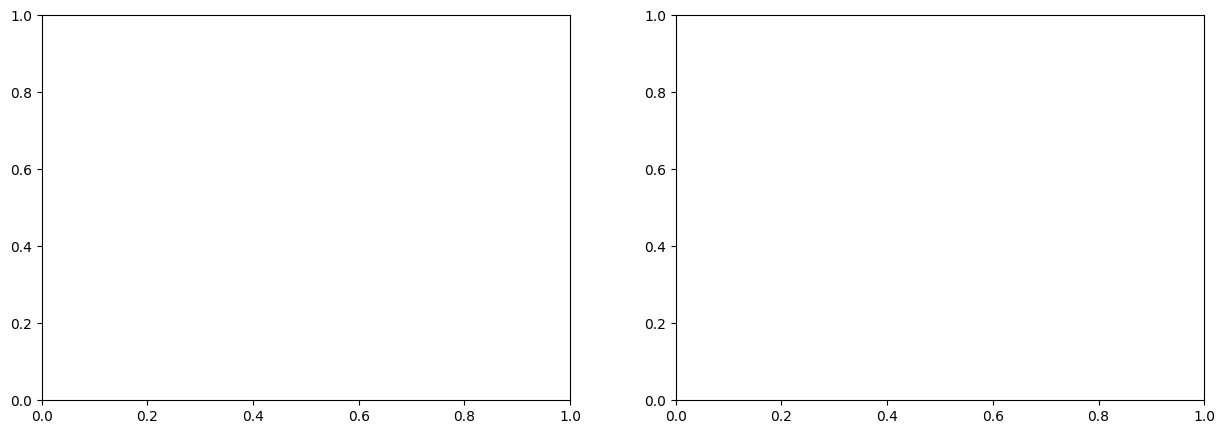

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,51)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
with open('anamoly_model_pkl', 'wb') as files:
    pickle.dump(model, files)

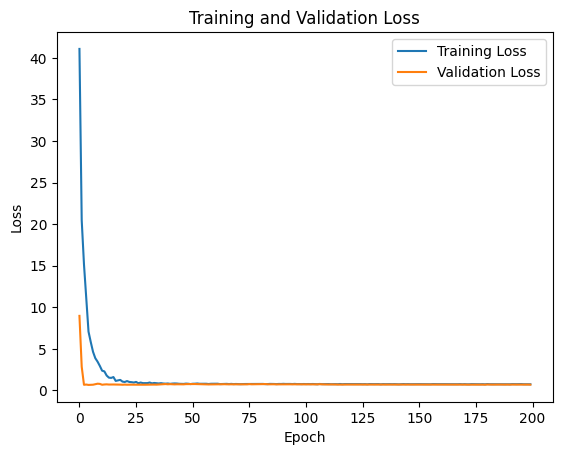

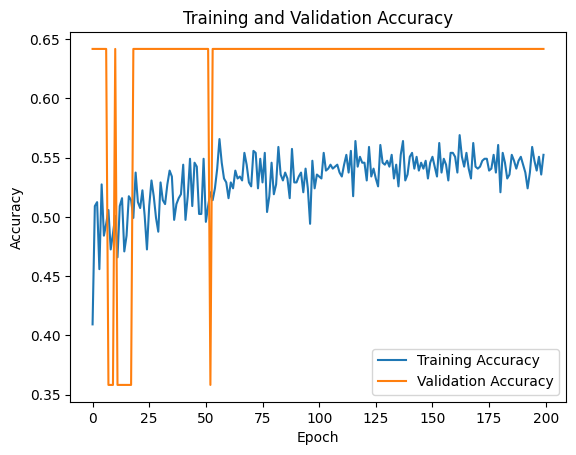

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history_dict

{'loss': [49.18827819824219,
  21.623525619506836,
  17.68830680847168,
  10.341534614562988,
  8.239828109741211,
  6.3462395668029785,
  5.002288818359375,
  4.39946174621582,
  3.58131742477417,
  3.133418560028076,
  2.6110942363739014,
  2.092167377471924,
  1.889579176902771,
  1.8749884366989136,
  1.4512869119644165,
  1.371395468711853,
  1.402945876121521,
  1.4416179656982422,
  1.229932427406311,
  1.153390645980835,
  1.2128612995147705,
  1.142139196395874,
  1.083483338356018,
  0.9644009470939636,
  0.9887824058532715,
  0.920547366142273,
  1.0104098320007324,
  0.9826647043228149,
  0.9011223316192627,
  0.9841518998146057,
  0.8834435939788818,
  0.891718864440918,
  0.9429274797439575,
  0.9814409613609314,
  0.8644537329673767,
  0.8547654747962952,
  0.959369957447052,
  0.8829401731491089,
  0.8750258088111877,
  0.8553345799446106,
  0.8638792037963867,
  0.8442540764808655,
  0.8457946181297302,
  0.803013801574707,
  0.8308203816413879,
  0.8140222430229187,
 

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.641791045665741


In [ ]:
filename="/content/drive/MyDrive/test_gun_audio.wav"
audio, sample_rate = librosa.load(filename) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-2.0194859e+02  1.1589201e+02 -2.0972855e+01  7.4778090e+00
 -1.7361588e+01 -6.1075072e+00 -1.7447927e+01 -6.1456618e+00
 -1.3857809e+01  2.4537883e+00 -9.0201263e+00  9.8160475e-01
 -7.7934451e+00 -3.6011879e+00 -5.2166581e+00 -3.7332413e+00
 -7.7288046e+00 -1.4600801e+00 -5.1594329e+00 -2.3344409e+00
 -4.5628548e+00 -2.3123534e+00 -5.0438757e+00 -7.7325219e-01
 -4.3209052e+00 -8.4538066e-01 -4.1076798e+00 -5.8065515e-02
 -4.5099134e+00 -5.2120060e-01 -4.0552335e+00  5.4411358e-01
 -3.3861864e+00 -2.0991592e-01 -2.1446834e+00  9.5347978e-02
 -2.2999070e+00  5.9361190e-01 -2.2259071e+00  1.2422442e-02]
[[-2.0194859e+02  1.1589201e+02 -2.0972855e+01  7.4778090e+00
  -1.7361588e+01 -6.1075072e+00 -1.7447927e+01 -6.1456618e+00
  -1.3857809e+01  2.4537883e+00 -9.0201263e+00  9.8160475e-01
  -7.7934451e+00 -3.6011879e+00 -5.2166581e+00 -3.7332413e+00
  -7.7288046e+00 -1.4600801e+00 -5.1594329e+00 -2.3344409e+00
  -4.5628548e+00 -2.3123534e+00 -5.0438757e+00 -7.7325219e-01
  -4.3209052e+00 

array(['gun_shot'], dtype='<U10')

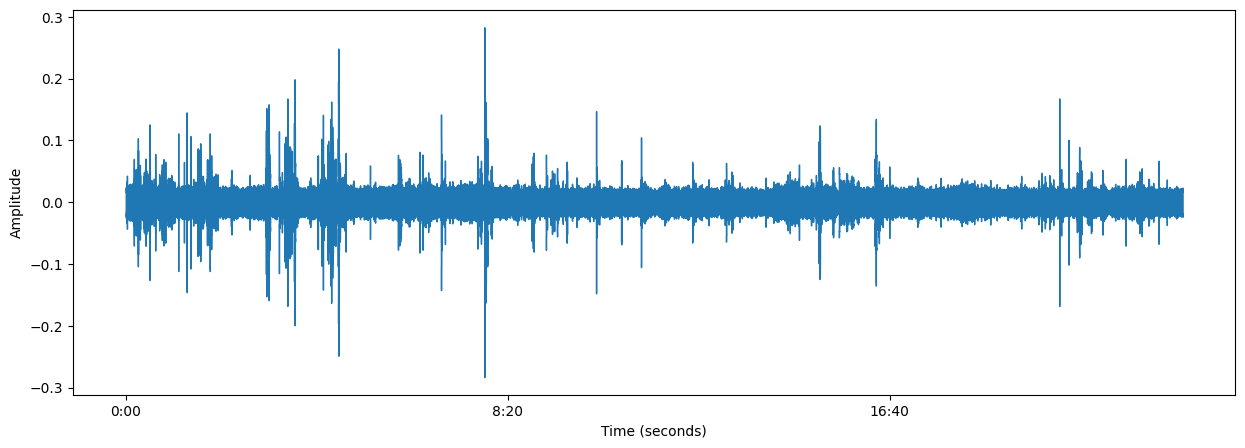

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time

# Load the audio file
audio_file_normal = '/content/drive/MyDrive/trainAudio/Normal/[ASMRAMBIENCE] McGill University Vibes.wav'
y, sr = librosa.load(audio_file_normal)

# Convert the audio file to a numerical representation
# Resample to 22050 Hz to reduce computation time
y_resampled = librosa.resample(y, orig_sr = sr, target_sr=22050)
#normal_start_time = time(0, 00)
time = np.linspace(0, len(y_resampled)/sr, len(y_resampled))

# Plot the sound wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_resampled, sr=22050)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Store the sound wave image in a variable
sound_wave_image = plt.gcf()

plt.savefig('sound_wave_image.jpg')

In [11]:
# Load the audio file
audio_file_current = 'sound_wave_image.jpg'
y, sr = librosa.load(audio_file_current)

# Convert the audio file to a numerical representation
# Resample to 22050 Hz to reduce computation time
y_resampled = librosa.resample(y, orig_sr = sr, target_sr=22050)
#current_start_time = time(0, 00)
time = np.linspace(0, len(y_resampled)/sr, len(y_resampled))

# Plot the sound wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_resampled, sr=22050)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Store the sound wave image in a variable
sound_wave_test_image = plt.gcf()

plt.savefig('sound_wave_test_image.jpg')

<ipython-input-11-2788226a1670>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_current)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: ignored

Image matching Error between the two images: 24.623570666666666


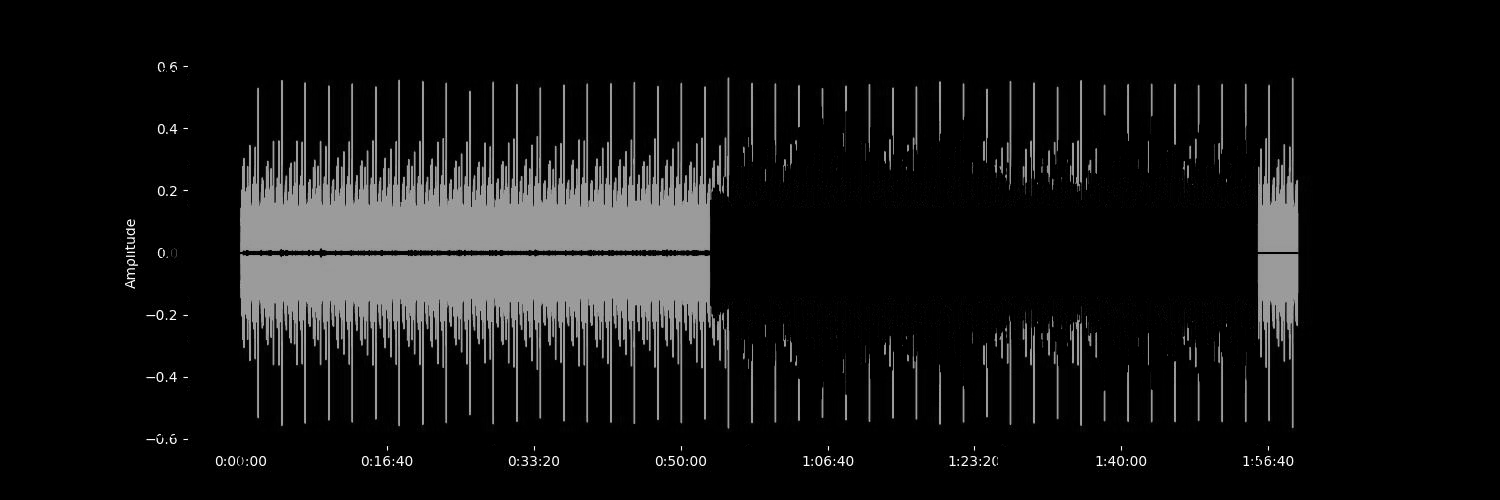

In [14]:
# import required libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load the input images
img1 = cv2.imread('sound_wave_image.jpg')
img2 = cv2.imread('sound_wave_test_image.jpg')

# convert the images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# define the function to compute MSE between two images
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

error, diff = mse(img1, img2)
print("Image matching Error between the two images:",error)

cv2_imshow(diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import copy
import librosa
import matplotlib.pyplot as plt

In [ ]:
# np.argmax(x)
def find_max_and_return_index(mylist):
    co = 0
    mymax = 0
    for i,value in enumerate(mylist):
        if mymax < value:
            mymax = value
            co = i
    return mymax,co

In [ ]:
list_folder = os.listdir('/content/drive/MyDrive/onlygunsounds/')

hop_length = 512 #the default spacing between frames
n_fft = 255 #number of samples

raw_x = []
raw_y = []
for i in list_folder:
    list_file_wave = os.listdir('/content/drive/MyDrive/onlygunsounds/' + i)
    for j in list_file_wave:
        filename = '/content/drive/MyDrive/onlygunsounds/' + i + '/' + j
        data, sr = librosa.load(filename,sr=22050)
        
        raw_x.append(data)
        raw_y.append(i)

In [ ]:
x = []
y = []
for i in range(len(raw_x)):
    data = raw_x[i]
    if len(data) == 44100:
        mfcc_data = np.array(librosa.feature.mfcc(y=data, n_fft=n_fft,hop_length=hop_length,n_mfcc=128))
        x.append(mfcc_data)
        y.append(raw_y[i])

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [ ]:
x_copy = copy.copy(x)
y_copy = copy.copy(y)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_copy)
y_copy_new = le.transform(y_copy)

In [ ]:
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
len_x_copy = []
for i in range(len(x_copy)):
    temp = x_copy[i].shape
    # print(temp)
    len_x_copy.append(temp)

In [ ]:
value, count = np.unique(len_x_copy, return_counts=True)
print(value,count)

[ 87 128] [745 745]


In [ ]:
x_copy = np.array(x_copy)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_copy, y_copy_new, test_size=0.25, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense,Dropout,Flatten
from tensorflow import keras

In [ ]:
input_shape = x_copy[0].shape

model = keras.Sequential()
model.add(LSTM(128,input_shape=input_shape,return_sequences=True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9, activation='softmax'))
model.summary()
model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128, 128)          110592    
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout_6 (Dropout)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2097280   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 48)               

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
6/6 [==============================] - 8s 871ms/step - loss: 2.4416 - accuracy: 0.1244 - val_loss: 2.1753 - val_accuracy: 0.1643
Epoch 2/50
6/6 [==============================] - 2s 354ms/step - loss: 2.1849 - accuracy: 0.1435 - val_loss: 2.1913 - val_accuracy: 0.1286
Epoch 3/50
6/6 [==============================] - 2s 362ms/step - loss: 2.1750 - accuracy: 0.1459 - val_loss: 2.1895 - val_accuracy: 0.1357
Epoch 4/50
6/6 [==============================] - 2s 320ms/step - loss: 2.0853 - accuracy: 0.1651 - val_loss: 2.1808 - val_accuracy: 0.1143
Epoch 5/50
6/6 [==============================] - 2s 370ms/step - loss: 2.0410 - accuracy: 0.2225 - val_loss: 2.1250 - val_accuracy: 0.1571
Epoch 6/50
6/6 [==============================] - 3s 487ms/step - loss: 2.0335 - accuracy: 0.1794 - val_loss: 2.1616 - val_accuracy: 0.1714
Epoch 7/50
6/6 [==============================] - 3s 551ms/step - loss: 1.9395 - accuracy: 0.2440 - val_loss: 2.1324 - val_accuracy: 0.1357
Epoch 8/50
6/6 [====

In [ ]:
with open('classification_model_pkl', 'wb') as files:
    pickle.dump(model, files)

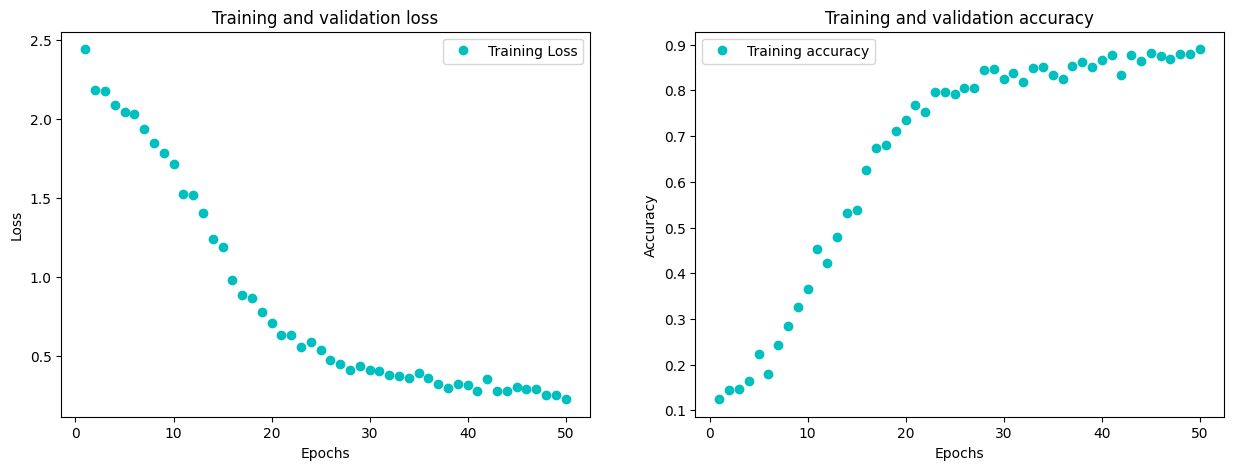

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,51)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
#ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
#ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
from tensorflow.math import confusion_matrix

TrainLoss, Trainacc = model.evaluate(X_train,y_train)
TestLoss, Testacc = model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)
print('Confusion_matrix: ',confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

6/6 [==============================] - 1s 60ms/step
Confusion_matrix:  tf.Tensor(
[[ 8  2  1  2  0  1  0  3  0]
 [ 3 10  0  0  0  3  0  1  0]
 [ 1  0  4  4  3  9  4  0  0]
 [ 0  1  3  3  1 14  0  3  0]
 [ 2  3  2  1  1  8  6  2  0]
 [ 0  1  0 14  1  3  2  4  0]
 [ 1  1  3  1  4  6  5  4  0]
 [ 2  0  0  3  2 12  1  5  0]
 [ 1  0  0  0  1  1  0  0  0]], shape=(9, 9), dtype=int32)


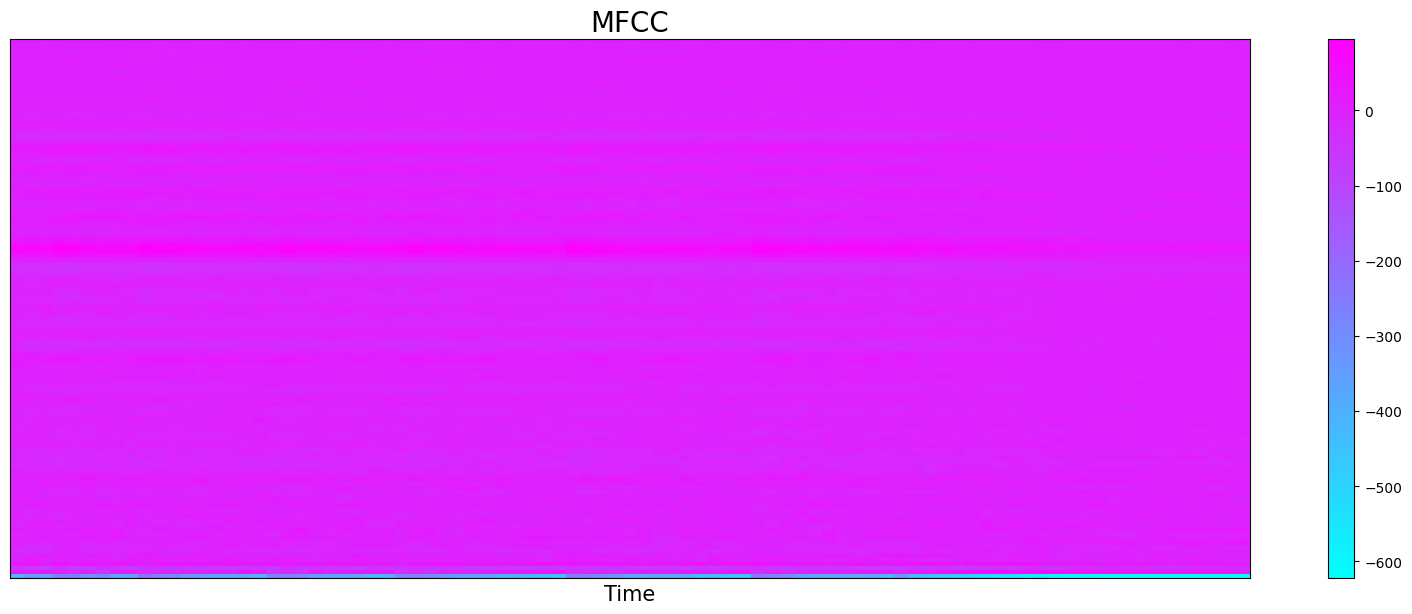

In [ ]:
import librosa.display
fig, ax = plt.subplots(figsize=(20,7))
librosa.display.specshow(X_train[0],sr=sr, cmap='cool',hop_length=hop_length)
ax.set_xlabel('Time', fontsize=15)
ax.set_title('MFCC', size=20)
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')

def downsample_audio(audio, sr, target_sr):
    resampled_audio = signal.resample(audio, int(len(audio) * target_sr / sr))
    return resampled_audio

def plot_audio_waveform(file1, file2, target_sr=16000):
    # Load the audio files
    audio1, sr1 = sf.read(file1)
    audio2, sr2 = sf.read(file2)

    # Downsample the audio files if necessary
    if sr1 != target_sr:
        audio1 = downsample_audio(audio1, sr1, target_sr)
        sr1 = target_sr
    if sr2 != target_sr:
        audio2 = downsample_audio(audio2, sr2, target_sr)
        sr2 = target_sr

    # Calculate the time axis
    duration1 = len(audio1) / sr1
    duration2 = len(audio2) / sr2
    time1 = np.linspace(0., duration1, len(audio1))
    time2 = np.linspace(0., duration2, len(audio2))

    # Create a new figure
    plt.figure()

    # Plot the audio waveforms
    plt.plot(time1, audio1, color='blue', label='Audio 1')
    plt.plot(time2, audio2, color='red', label='Audio 2')

    # Set the labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Waveforms')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()

# Provide the paths to your audio files
audio_file1 = '/content/drive/MyDrive/trainAudio/Normal/[ASMRAMBIENCE] McGill University Vibes.wav'
audio_file2 = '/content/drive/MyDrive/trainAudio/gun_shot/7065-6-0-0.wav'

# Call the function to plot the audio waveforms
plot_audio_waveform(audio_file1, audio_file2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


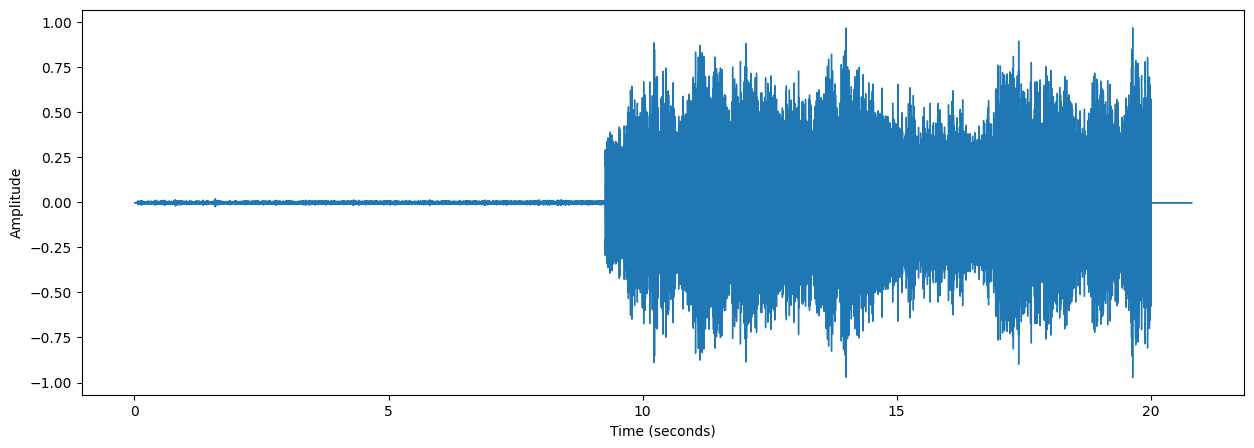

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time

# Load the audio file
audio_file_normal = '/content/drive/MyDrive/screaming.wav'
y, sr = librosa.load(audio_file_normal)

# Convert the audio file to a numerical representation
# Resample to 22050 Hz to reduce computation time
y_resampled = librosa.resample(y, orig_sr = sr, target_sr=22050)
#normal_start_time = time(0, 00)
time = np.linspace(0, len(y_resampled)/sr, len(y_resampled))

# Plot the sound wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_resampled, sr=22050)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Store the sound wave image in a variable
sound_wave_image = plt.gcf()

plt.savefig('sound_wave_image.jpg')

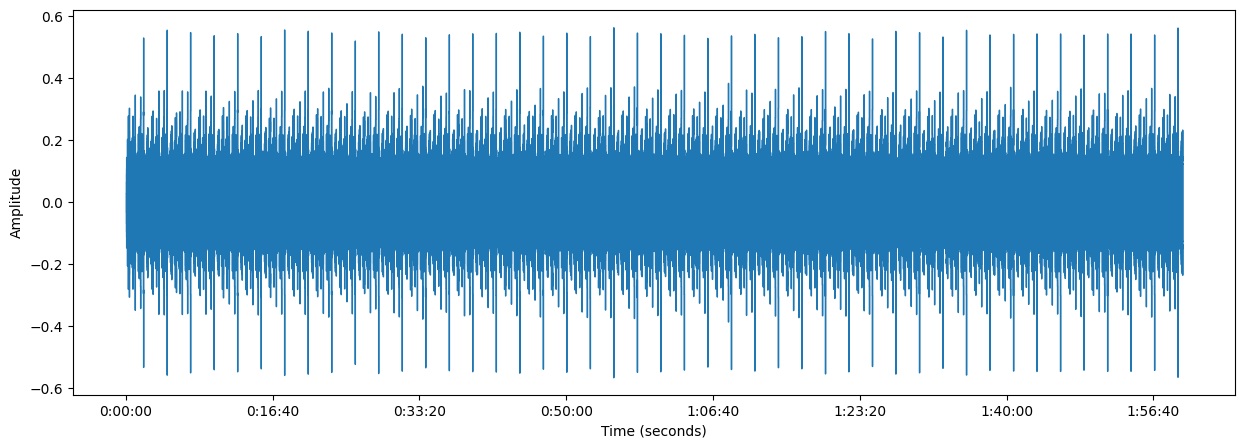

In [13]:
# Load the audio file
audio_file_current = '/content/drive/MyDrive/trainAudio/Normal/School Cafeteria Sounds - People Talking, Cutlery, Food (2 Hours).wav'
y, sr = librosa.load(audio_file_current)

# Convert the audio file to a numerical representation
# Resample to 22050 Hz to reduce computation time
y_resampled = librosa.resample(y, orig_sr = sr, target_sr=22050)
#current_start_time = time(0, 00)
time = np.linspace(0, len(y_resampled)/sr, len(y_resampled))

# Plot the sound wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_resampled, sr=22050)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Store the sound wave image in a variable
sound_wave_test_image = plt.gcf()

plt.savefig('sound_wave_test_image.jpg')

In [ ]:
# import required libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load the input images
img1 = cv2.imread('sound_wave_image.jpg')
img2 = cv2.imread('sound_wave_test_image.jpg')

# define the function to compute MSE between two images
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

error, diff = mse(img1, img2)
print("Image matching Error between the two images:",error)

cv2_imshow(diff)
cv2.waitKey(0)
cv2.destroyAllWindows() 

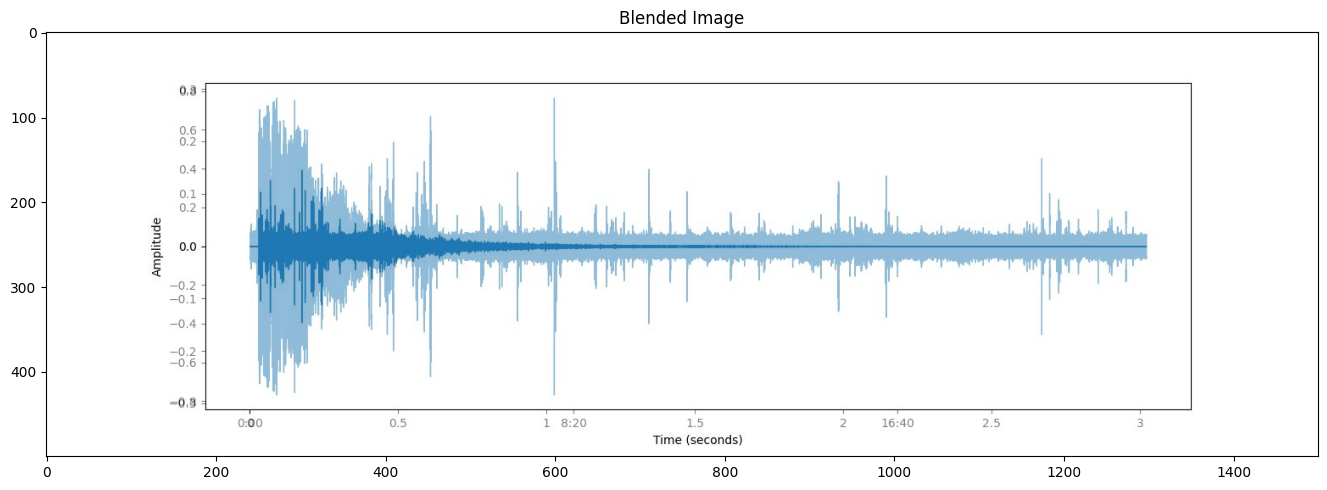

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the input images
img1 = cv2.imread('sound_wave_test_image.jpg')
img2 = cv2.imread('sound_wave_image.jpg')

# convert the images to RGB format
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# resize the images to have the same dimensions if necessary
# img1 = cv2.resize(img1, (width, height))
# img2 = cv2.resize(img2, (width, height))

# blend the two images together with different colors
alpha = 0.5  # blending factor
blended = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

plt.figure(figsize=(15, 5))
plt.imshow(blended)
plt.title('Blended Image')

plt.tight_layout()
plt.show()
